In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential  #burada model oluşturulur
from tensorflow.keras.layers import Dense       #burada model içine katmanlar eklenir
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model

In [236]:
dataFrame = pd.read_excel("merc.xlsx")

In [237]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [238]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [239]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 700x300 with 0 Axes>

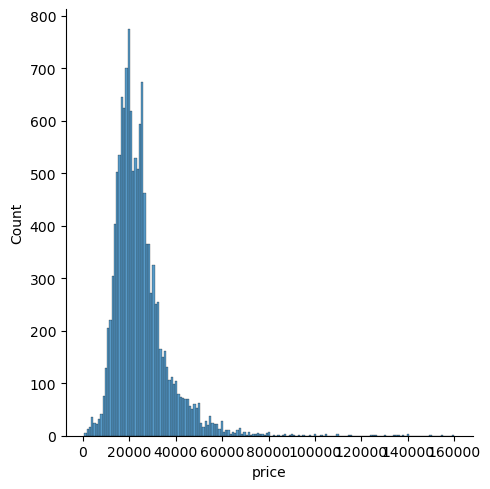

In [240]:
plt.figure(figsize=(7,3))
sbn.displot(dataFrame["price"])  #dağılım grafiği gösterir

Bu grafiğe göre yüksek fiyatta olan az sayıda araba var. Bu veriler sebebiyle fiyatlar çok yukarda çıkabilir ve doğru veriler elde edilemeyebilir. Bu sebepten bu veriler verisetinden çıkarılabilir. (yaklaşık 131 tane)

<Axes: xlabel='year', ylabel='count'>

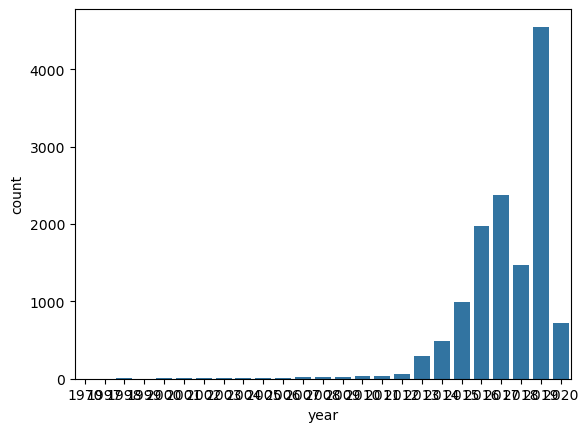

In [241]:
sbn.countplot(data=dataFrame, x="year") 

In [242]:
dataFrame = dataFrame.drop("transmission", axis = 1)

In [243]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [244]:
dataFrame.corr()["price"].sort_values() #küçükten büyüğe sıralar

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

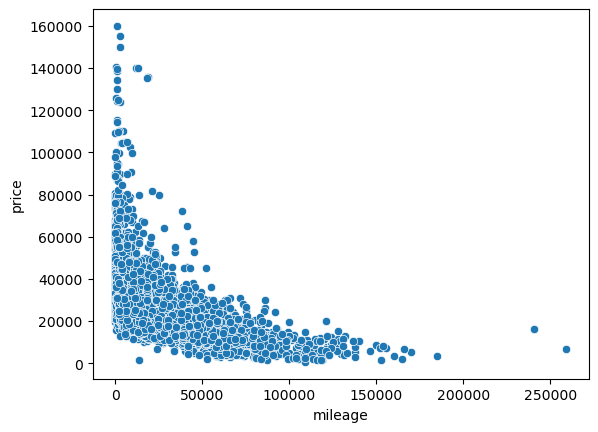

In [245]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame)

In [246]:
dataFrame.sort_values("price", ascending = False).head(20) #fiyatların büyükten küçüğe sıralanması


,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


In [247]:
dataFrame.sort_values("price", ascending = True).head(20)

,year,price,mileage,tax,mpg,engineSize
11816,2003,650,109090,235,40.0,1.4
12008,2010,1350,116126,145,54.3,2.0
11765,2000,1490,87000,265,27.2,3.2
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11174,2001,1695,108800,325,31.7,3.2
12710,2006,1695,153000,300,33.6,1.8
12766,2004,1780,118000,265,41.5,2.2
12009,2007,1800,84000,200,42.8,1.5
11764,1998,1990,99300,265,32.1,2.3


### **Veri Temizliği**

In [248]:
len(dataFrame)

13119

In [249]:
len(dataFrame) * 0.01 #çıkarılacak veri sayısı(%1 kadar)

131.19

In [250]:
yuzde99dataFrame = dataFrame.sort_values("price", ascending=False).iloc[131:]

In [251]:
yuzde99dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 700x400 with 0 Axes>

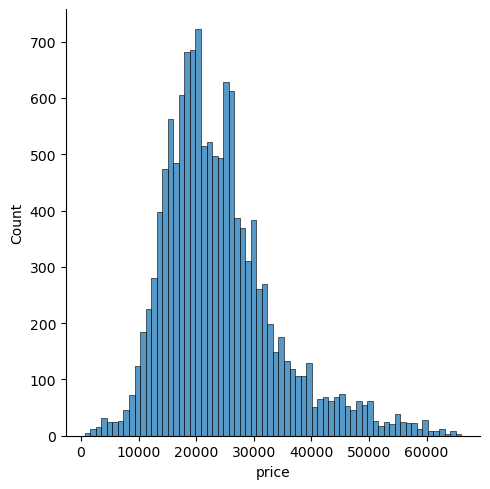

In [252]:
plt.figure(figsize=(7,4))
sbn.displot(yuzde99dataFrame["price"])

In [253]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [254]:
dataFrame.groupby("year").mean()["price"] #yıllara göre ortalama araba fiyatları

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [255]:
yuzde99dataFrame.groupby("year").mean()["price"]
#1970 lerdeki araba fiyatları yaklaşık beklenen artışı bozuyor. çıkarılabilir.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [256]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [257]:
dataFrame = yuzde99dataFrame

In [258]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [259]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [260]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


### **Model Oluşturma**

In [261]:
y = dataFrame["price"].values # ulaşılmak istenen değer
x = dataFrame.drop("price", axis = 1).values # price haricinde geri kalanlar

In [262]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [263]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [265]:
len(x_train)

9090

In [266]:
len(x_test)

3897

In [267]:
scaler = MinMaxScaler()

In [268]:
x_train = scaler.fit_transform(x_train)

In [269]:
x_test = scaler.transform(x_test)

In [270]:
x_train.shape

(9090, 5)

In [271]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [272]:
model.fit(x = x_train, y = y_train,validation_data=(x_test, y_test),batch_size=250,epochs=300)


Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 669063360.0000 - val_loss: 688092992.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 677955392.0000 - val_loss: 688011904.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 671116608.0000 - val_loss: 687685696.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 670924544.0000 - val_loss: 686699840.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 664949440.0000 - val_loss: 684031296.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 664027392.0000 - val_loss: 677874432.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 658608320.0000 - val_loss: 665479040.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 656207296.0000 - val_loss: 642603584.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 611099264.0000 - val_loss: 604237760.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 578614336.000

In [138]:
# model.fit(...)	Modeli eğitmeye başlatır. (Fit = Eğit)
# x=x_train	Eğitim için girdi verilerini verir. (özellikler, inputlar)
# y=y_train	Eğitim için hedef/etiket verilerini verir. (output, ground truth)
# validation_data=(x_test, y_test)	Eğitim sırasında her epoch sonunda modelin doğruluğunu test etmek için kullanılan ayrılmış test verisi. Böylece overfitting fark edilir.
# batch_size=250	Her iterasyonda modele 250 örnek birden verilir. (Büyük veri kümesinde eğitim daha verimli olur.)
#epochs=300	Tüm eğitim verisini 300 kere modelin üzerinden geçir. Yani eğitim 300 tur (epoch) sürecek.


In [273]:
kayıpVeri = pd.DataFrame(model.history.history)
kayıpVeri.head()

,loss,val_loss
0,672139968.0,688092992.0
1,672101184.0,688011904.0
2,671923072.0,687685696.0
3,671347200.0,686699840.0
4,669691520.0,684031296.0


<Axes: >

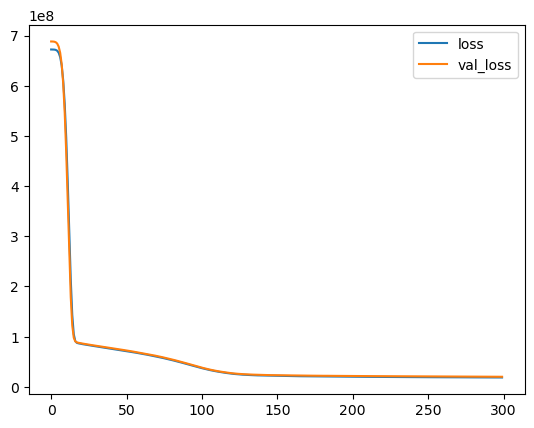

In [274]:
kayıpVeri.plot()

In [275]:
tahminDizisi = model.predict(x_test)
tahminDizisi

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


array([[21706.398],
       [23511.914],
       [25444.295],
       ...,
       [26432.586],
       [12543.418],
       [24965.781]], dtype=float32)

In [276]:
mean_absolute_error(y_test, tahminDizisi)

3189.440185546875

In [277]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


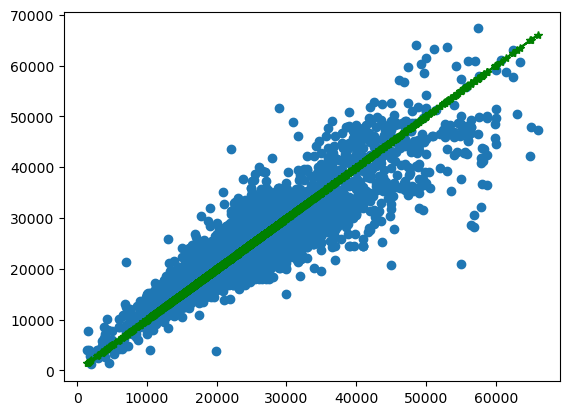

In [278]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test, "g-*")

In [280]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [281]:
yeniArabaSeries = dataFrame.drop("price", axis = 1).iloc[2]

In [282]:
type(yeniArabaSeries)

pandas.core.series.Series

In [283]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [285]:
model.predict(yeniArabaSeries) #tahmin edilen fiyat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[61745.89]], dtype=float32)